In [28]:
import uproot3 as uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
date = datetime.today().strftime('%Y%m%d')

def loadSingleFile( tfile, treename, flatenndf=False ):
    ttree = uproot.open(tfile)
    data = ttree[treename].arrays(outputtype=pd.DataFrame,flatten=flatenndf)
    return data

def loadFiles( filelist, treename1, treename2, maxfiles=100, flatenndf=False):
    data1 = pd.DataFrame()
    data2 = pd.DataFrame()
    for i,tfile in enumerate(filelist[0:maxfiles]):
        if i%10 == 0:
            print("{} files processed".format(i))
        ttree = uproot.open(tfile)
        data1 = pd.concat([data1, ttree[treename1].arrays(outputtype=pd.DataFrame,flatten=flatenndf)])
        data2 = pd.concat([data2, ttree[treename2].arrays(outputtype=pd.DataFrame,flatten=flatenndf)])
    return data1, data2

## Prepare data files

In [29]:
### PREPARE DATA ####
RUN = "10085"
MATCHES = "../output/run{}_matched_light_tracks.txt".format(RUN)
LIGHTINFO = "../inputs/run{}_tracks_BNBMAJORITY_files.txt".format(RUN)
OUTFILE = "../output/residuals/Run_2/run{}_test_no8ns_{}.csv".format(RUN,date)
FILENAMES = [ line.strip() for line in open(LIGHTINFO, "r") ]

#maxim = 120
maxim = len(FILENAMES)
print(maxim)

194


### CASE 1: New (complete) light trees 

In [30]:
## Get the light data and combine the two cryostats
dfw, dfe = loadFiles(FILENAMES, "simpleLightAna/opflashCryoW_flashtree", "simpleLightAna/opflashCryoE_flashtree", maxim)
dfw["cryo"] = 1
dfe["cryo"] = 0
dfw.drop(columns=["multiplicity","multiplicity_right","multiplicity_left","sum_pe","sum_pe_right","sum_pe_left"],inplace=True)
dfe.drop(columns=["multiplicity","multiplicity_right","multiplicity_left","sum_pe","sum_pe_right","sum_pe_left"],inplace=True)
df = pd.concat([dfe, dfw])

del dfw
del dfe

0 files processed
10 files processed
20 files processed
30 files processed
40 files processed
50 files processed
60 files processed
70 files processed
80 files processed
90 files processed
100 files processed
110 files processed
120 files processed
130 files processed
140 files processed
150 files processed
160 files processed
170 files processed
180 files processed
190 files processed


In [31]:
## Now match with the selected tracks
dfmatches = pd.read_csv(MATCHES)
dfmatches.rename(columns={'flashID':"flash_id"}, inplace=True)
dfmatches.set_index(["run", "event", "cryo", "flash_id"], inplace=True)
df = (df.join( dfmatches, on=["run", "event", "cryo", "flash_id"], how='inner'))
df["channel_id"] = df.pmt_y.apply( lambda x : np.arange(len(x)) )

print("Consider {} tracks".format( len(df) ) )

Consider 5294 tracks


In [6]:
df.head()

,run,event,timestamp,flash_id,flash_time,flash_y,flash_width_y,flash_z,flash_width_z,pmt_x,...,trackStartY,trackStartZ,trackEndX,trackEndY,trackEndZ,trackDirX,trackDirY,trackDirZ,trackLenght,channel_id
entry,,,,,,,,,,,,,,,,,,,,,
10,10085,48300,1689168810,10,-896.115662,-36.086082,71.162964,204.584351,126.756607,"[-371.07, -371.07, -371.07, -371.07, -371.07, ...",...,132.457,147.0860,-237.754,-178.355,232.907,-0.154724,-0.953370,0.259125,327.847,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
87,10085,48720,1689169578,2,69.927979,-39.180996,67.897018,-192.220657,111.448425,"[-371.07, -371.07, -371.07, -371.07, -371.07, ...",...,130.759,-114.3860,-331.469,-177.988,-232.220,-0.599116,-0.752663,-0.273054,427.222,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
126,10085,48828,1689169778,6,106.811913,-35.342167,77.045502,-574.139099,133.706375,"[-371.07, -371.07, -371.07, -371.07, -371.07, ...",...,131.018,-435.2900,-78.705,-180.387,-702.340,0.280894,-0.792557,-0.541250,456.314,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
194,10085,49248,1689170545,3,158.667053,-29.936361,70.356178,-195.087463,126.658081,"[-371.07, -371.07, -371.07, -371.07, -371.07, ...",...,133.202,-256.7960,-237.216,-178.374,-125.369,-0.226533,-0.917744,0.326234,348.260,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
205,10085,49284,1689170608,7,271.606689,-11.526424,75.764465,-124.893959,130.923599,"[-371.07, -371.07, -371.07, -371.07, -371.07, ...",...,136.085,-10.9526,-261.642,-178.677,-251.060,-0.455809,-0.685178,-0.568128,442.779,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


### CASE 2: Old (incomplete light trees)

In [ ]:
dfw, dfe = loadFiles(FILENAMES, "simpleLightAna/opflashCryoW_flashtree", "simpleLightAna/opflashCryoE_flashtree", maxim)
dfw["cryo"] = 1
dfe["cryo"] = 0
dfw.drop(columns=["multiplicity","multiplicity_right","multiplicity_left","sum_pe","sum_pe_right","sum_pe_left"],inplace=True)
dfe.drop(columns=["multiplicity","multiplicity_right","multiplicity_left","sum_pe","sum_pe_right","sum_pe_left"],inplace=True)
df = pd.concat([dfe, dfw])

del dfe
del dfw

In [ ]:
dfopw, dfope = loadFiles(FILENAMES, "simpleLightAna/opflashCryoW_ophittree", "simpleLightAna/opflashCryoE_ophittree", maxim)
dfopw["cryo"] = 1
dfope["cryo"] = 0
dfop = pd.concat([dfope, dfopw])

del dfope
del dfopw

In [ ]:
geo = loadSingleFile(FILENAMES[0], "simpleLightAna/geotree")
x = geo.pmt_x.values[0] ; y = geo.pmt_y.values[0] ; z = geo.pmt_z.values[0]
dfop["pmt_x"] = [ x[ch] for ch in dfop.channel_id.values ] 
dfop["pmt_y"] = [ y[ch] for ch in dfop.channel_id.values ] 
dfop["pmt_z"] = [ z[ch] for ch in dfop.channel_id.values ]

del geo

In [ ]:
dfop = dfop.groupby(["run", "event", "cryo","flash_id","channel_id"]).agg({ "start_time":"min", "pmt_y":"mean", "pmt_x":"mean", "pe":"sum", "pmt_z":"mean" }).reset_index()
dfop = dfop.groupby(["run", "event", "cryo","flash_id"]).agg(list)
dfop.rename(columns={'start_time':"time_pmt", "pe":"pe_pmt"}, inplace=True)
df = (df.join( dfop, on=["run", "event", "cryo", "flash_id"], how='inner'))

del dfop

In [ ]:
## Now match with the selected tracks
dfmatches = pd.read_csv(MATCHES)
dfmatches.rename(columns={'flashID':"flash_id"}, inplace=True)
dfmatches.set_index(["run", "event", "cryo", "flash_id"], inplace=True)
df = (df.join( dfmatches, on=["run", "event", "cryo", "flash_id"], how='inner'))

print("Consider {} tracks".format( len(df) ) )

In [ ]:
df.head()

## Check tracks

5294 2473


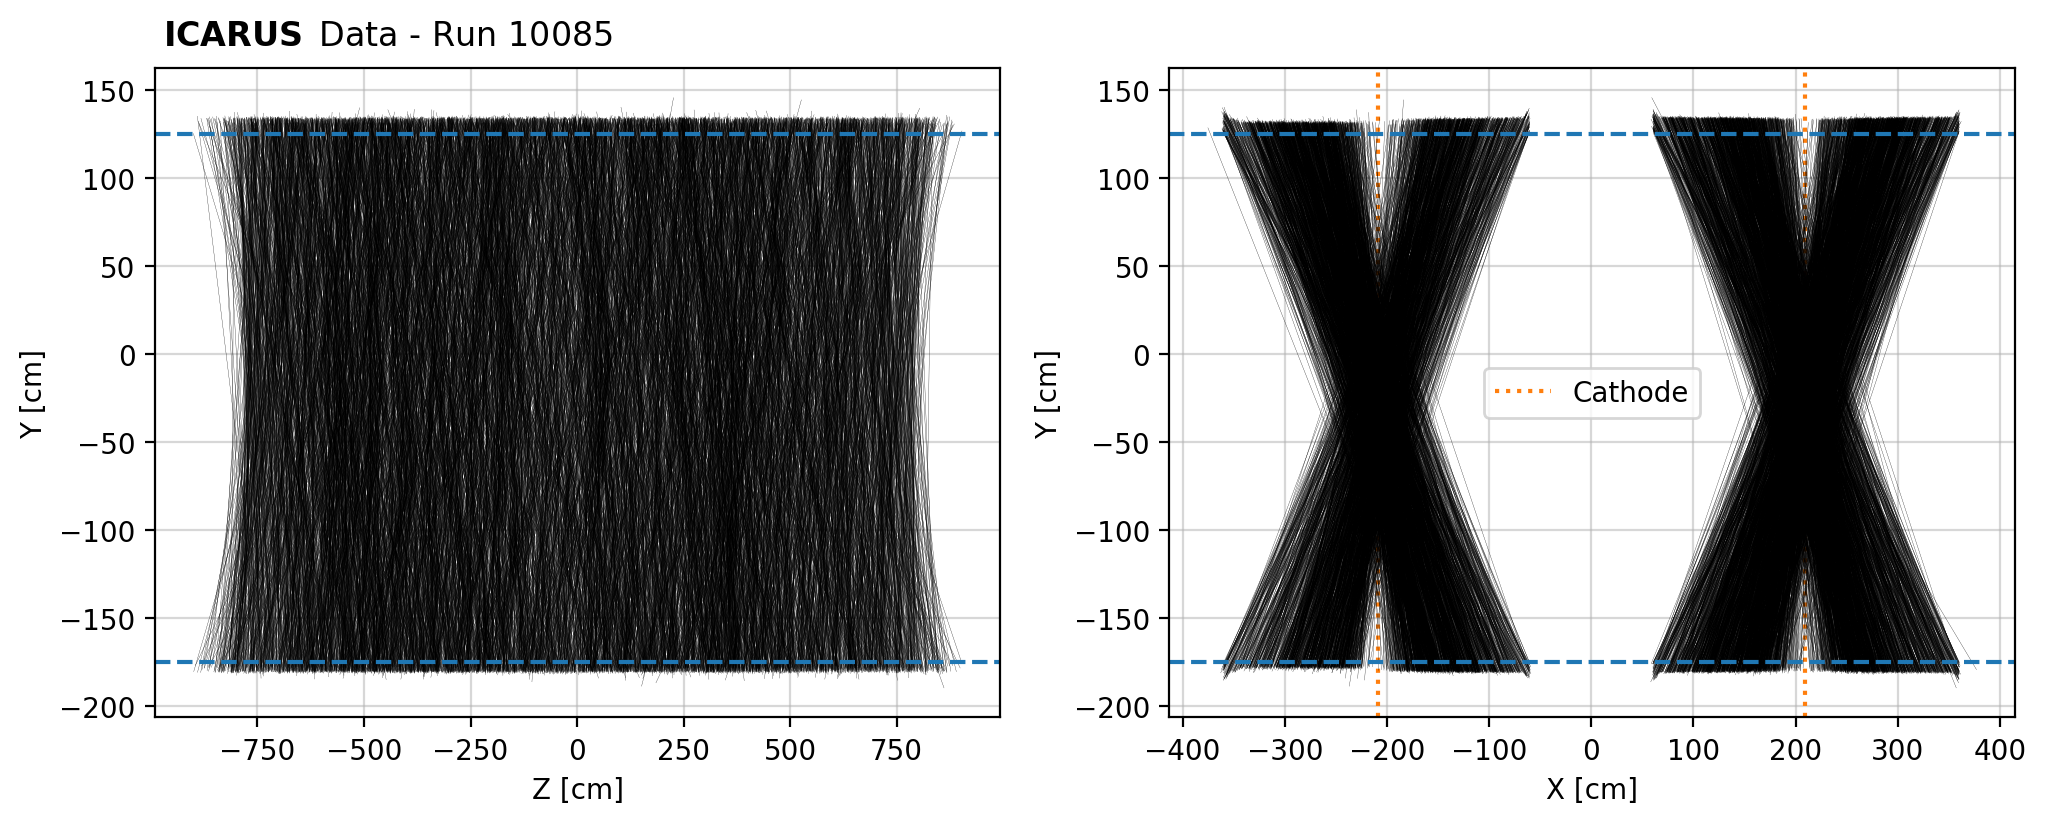

In [36]:
fig, ax = plt.subplots(1,2, figsize=(12, 4.3),dpi=200)

ax[0].plot( [df.trackEndZ, df.trackStartZ], [df.trackEndY, df.trackStartY], color='black', lw=0.1 )
ax[0].axhline(y=125., linestyle="dashed")
ax[0].axhline(y=-175., linestyle="dashed")

ax[1].axvline(x=209., linestyle="dotted", color="C1", label="Cathode")
ax[1].axvline(x=-209., linestyle="dotted", color="C1")
ax[1].plot( [df.trackEndX, df.trackStartX], [df.trackEndY, df.trackStartY], color='black', lw=0.1 )
ax[1].axhline(y=125., linestyle="dashed")
ax[1].axhline(y=-175., linestyle="dashed")

# consider steeper angle
_sel_dir_z= (df.trackDirZ > -0.3) & (df.trackDirZ < 0.3 ) 
_sel_dir_x = (df.trackDirX > -0.1) & (df.trackDirX < 0.1 )
_seldir= _sel_dir_z
#ax[0].plot( [dfmatches[_seldir].trackEndZ, dfmatches[_seldir].trackStartZ], [dfmatches[_seldir].trackEndY, dfmatches[_seldir].trackStartY], color='red', lw=0.1 )
#ax[1].plot( [dfmatches[_seldir].trackEndX, dfmatches[_seldir].trackStartX], [dfmatches[_seldir].trackEndY, dfmatches[_seldir].trackStartY], color='red', lw=0.1 )

print( len(df), len(df[_seldir]) )

ax[0].set_ylabel("Y [cm]" )  
ax[0].set_xlabel("Z [cm]" )
ax[0].grid(alpha=0.5)

ax[1].set_ylabel("Y [cm]" )  
ax[1].set_xlabel("X [cm]" ) 
ax[1].grid(alpha=0.5)

watermark = r'$\mathbf{ICARUS}\,$ Data' +' - Run {}'.format(RUN)
ax[0].text(0.01, 1.05, watermark, fontsize=12, color='black', alpha=1,
         ha='left', va='center', transform=ax[0].transAxes)

plt.legend()
plt.savefig("../figs/run{}_tracks_standard_selection.pdf".format(RUN))
plt.show()

## Explode the dataframe

In [ ]:
## Explode the dataframe 
df = df.explode(["time_pmt", "pmt_x", "pmt_y", "pe_pmt", "pmt_z", "amplitude_pmt","channel_id"])

## Add timing corrections (if needed!)

In [ ]:
### REMOVE 8ns phase correction from WE-TOP-C
wetopc = [238, 239, 235, 236, 237, 230, 233, 234, 232, 231, 220, 223, 224, 222, 221]
df.loc[(df['channel_id'].isin(wetopc))&(df['pe_pmt']>0), 'time_pmt'] += 0.008 #in us

In [ ]:
## Import and use laser correction
## WARNING: DO NOT USE IF CORRECTIONS WERE ALREADY APPLIED AT STAGE0 
## note: laser corrections are in ns!

LASERCORR="../inputs/laser_time_corrections_9305.csv"
#LASERCORR="../inputs/laser_time_corrections_20220408.csv"
lasercorr = pd.read_csv(LASERCORR).set_index(["channel_id"])
lasercorr['t_signal'] = lasercorr['t_signal']/1e3  #convert ns to us

df = df.join( lasercorr[["t_signal"]], on=["channel_id"])
df['time_pmt'] = df['time_pmt'] + df['t_signal']  ###WARNING:: CURRENTLY REMOVING LASER!!!

In [ ]:
## WARNING: adding cosmics corrections
#COSMICSCORR = "../output/residuals/Run_2/run9337_test_20230921.csv"
COSMICSCORR = "../output/residuals/FINAL/cosmics_timing_residuals_t8046_offpmts_20230727.csv"
cosmics = pd.read_csv(COSMICSCORR).set_index("channel_id")

df = df.join( cosmics["mean_residual_ns"], on="channel_id" )
df["time_pmt"] = df["time_pmt"]+df["mean_residual_ns"]/1e3 #convert ns to us

In [ ]:
df.loc[df["pe_pmt"]>100,["event","cryo","flash_id","pmt_y","channel_id","time_pmt",'t_signal','mean_residual_ns']]

In [ ]:
df = df.drop(columns=["t_signal"])

In [ ]:
df = df.drop(columns=["mean_residual_ns"])

## Computing fit and residuals

In [ ]:
_pecut=300

_sel = (df.pe_pmt > _pecut)
meandf = df[_sel][["run", "event", "cryo", "flash_id", "time_pmt", "pe_pmt", "pmt_y"]].groupby(["run", "event", "cryo", "flash_id", "pmt_y"]).apply( 
    lambda x : pd.Series( {
        "mean_time" : np.mean(x.time_pmt),
        "weight_mean_time" : np.average(x.time_pmt, weights=x.pe_pmt), 
        "error_mean_time": np.std(x.time_pmt) / np.sqrt(len(x.time_pmt)),
    }) ).reset_index()

meandf = meandf.groupby(["run", "event", "cryo", "flash_id"]).agg(list)

print("PE cut leaves {} tracks".format( len(meandf) ))

In [ ]:
def getdiff( y, t):
    # max y is on top : cosmics are going towards decreasing y 
    return t[np.argmin(y)] - t[np.argmax(y)]

def fittime( y, t ):
    try:
        res= stats.linregress(y, t)
        #print( res.intercept, res.slope)
        return res.intercept,  res.slope
    except:
        return 0,0

def residuals( tobs, y, a, b ):
    return tobs -  ( a + b*y )

In [ ]:
meandf["diff_time"] = meandf.apply( lambda x : getdiff( x.pmt_y, x.mean_time ), axis=1 ) 
meandf[["intercept", "slope"]] = meandf.apply(lambda x : fittime(x.pmt_y, x.mean_time ), axis=1, result_type="expand" )

In [ ]:
meandf.head()

In [ ]:
# Putting fit back in the exploded dataframe, then compute the residual
# This should work for every channel_id

# TEST: only positive slopes
#dfg = df.join( meandf[meandf.slope<0][["intercept", "slope"]], on=["run", "event", "cryo", "flash_id"], how='inner')

# all slopes
dfg = df.join( meandf[["intercept", "slope"]], on=["run", "event", "cryo", "flash_id"], how='inner')
dfg["residuals"] = dfg.apply( lambda x : residuals(x.time_pmt, x.pmt_y, x.intercept, x.slope), axis=1 ) 

# Keep only the residuals on relevant PMT for that event
PECUT = 300
dfg = dfg[(dfg.pe_pmt>PECUT)]

In [ ]:
print("Using the above slopes leaves {} tracks".format( len(dfg.groupby(["run", "event", "cryo", "flash_id"])) ) )
dfg.to_csv("dump_run{}_test8ns.csv".format(RUN))

In [ ]:
dfg.head()

## Group and save residuals

In [ ]:
us_to_ns = 1e3
thisdfg = dfg.groupby(["channel_id"]).apply(
    lambda x : pd.Series( { 
            'x': np.mean(x.pmt_x),
            'y': np.mean(x.pmt_y),
            'z': np.mean(x.pmt_z),
            'entries' : len(x.residuals), 
            'pecut' : PECUT,
            'mean_residual_ns' : np.mean(x.residuals)*us_to_ns,
            'std_residual_ns' : np.std(x.residuals)*us_to_ns,
            'emean_ns' : np.std(x.residuals)*us_to_ns/len(x.residuals)
        })).reset_index()

In [ ]:
thisdfg.head()

In [ ]:
thisdfg.to_csv(OUTFILE, index=False, float_format='%.4f')

## Looking at some residuals

In [ ]:
selected_channel = 86
residuals = dfg[dfg.channel_id==selected_channel].residuals.values

In [ ]:
fig = plt.figure(dpi=100)

lab = "Channel ID "+str(selected_channel)+"\n"
lab += "Entries: {}\n".format(len(residuals))
lab += "Mean: {:.2f} ns\n".format(np.mean(residuals*1e3))
lab += "Std: {:.2f} ns".format(np.std(residuals*1e3))

plt.hist( residuals*1e3, bins=50, histtype='step',range=(-10,20), label=lab)
#plt.ylabel("# entries", fontsize=16)
plt.xlabel("Residuals [ns]", fontsize=14)
plt.tight_layout()
plt.grid(linestyle="dashed", alpha=0.5)
plt.legend(fontsize=12)
plt.savefig("../figs/run{}_channel_{}_residuals_test.png".format(RUN,selected_channel),dpi=100)
plt.show()


In [ ]:
# Plotting full distribution 
fig = plt.figure(dpi=100)

rmin=-10
rmax=10
r=(rmin,rmax)
s=0.5
b=int((rmax-rmin)/s)

res = thisdfg.mean_residual_ns.to_numpy()

lab = "Run {}\nMean: {:.2f} ns\nStd: {:.2f} ns".format(RUN,np.mean(res),np.std(res))

plt.hist(res, bins=b, linewidth=2, range=r, histtype="step", label=lab)

plt.xlabel("Time residual [ns]")
plt.ylabel("# PMTs")
plt.legend()
plt.grid(linestyle="dashed", alpha=0.5)
plt.savefig("../figs/run{}_residuals_test.png".format(RUN),dpi=100)
plt.show()

## Looking at slope

In [ ]:
slopes = meandf["slope"].values
len(slopes)

In [ ]:
fig = plt.figure(dpi=100)

plt.hist( slopes*1e3, bins=50, range=(-0.1,0.075), histtype='step')
plt.ylabel("# Flash-Track matches", fontsize=14)
plt.xlabel("Fitted slope [cm ns$^{-1}$]", fontsize=14)

plt.axvline(x=0.,color="red",linestyle="dotted")

#plt.tight_layout()
plt.grid(linestyle="dashed",alpha=0.5)
#plt.legend()
plt.savefig("../figs/run{}_slope_distribution_test.png".format(RUN),dpi=100)
plt.show()


## Add lines with PMTs that are off

In [10]:
file = "../output/residuals/Run_2/run{}_residuals_test8ns.csv".format(RUN)
rdf = pd.read_csv(file)

# list of PMT channels at 0 voltage from HV files + disconnected pmts:
offCHs = [350, 248, 215, 190, 161, 139, 127, 103, 131, 59, 52, 21, 5, 71]

In [11]:
geo = loadSingleFile(FILENAMES[0], "simpleLightAna/geotree")
x = geo.pmt_x.values[0] ; y = geo.pmt_y.values[0] ; z = geo.pmt_z.values[0]

In [12]:
dict = {'channel_id':[ a for a in offCHs],
        'x':[ x[a] for a in offCHs],
        'y':[ y[a] for a in offCHs],
        'z':[ z[a] for a in offCHs],
        'entries': [ 0 for a in offCHs],
        'pecut': [ 0. for a in offCHs],
        'mean_residual_ns': [ 0. for a in offCHs],
        'std_residual_ns': [ 0. for a in offCHs],
        'emean_ns': [ 0. for a in offCHs]        
       }

In [13]:
addf = pd.DataFrame(dict)
rdf = pd.concat([rdf,addf], ignore_index=True)
rdf.sort_values(by="channel_id", inplace=True)

In [14]:
rdf.head(7)

,channel_id,x,y,z,entries,pecut,mean_residual_ns,std_residual_ns,emean_ns
0,0,-371.070100,-76.250000,-872.899900,47.0,300.0,2.5419,2.6858,0.0571
1,1,-371.070000,29.350000,-872.900200,18.0,300.0,0.8932,2.1692,0.1205
2,2,-371.070000,-129.050000,-823.019800,19.0,300.0,0.4294,1.7503,0.0921
3,3,-371.070100,-23.450000,-823.019700,53.0,300.0,1.4347,2.5279,0.0477
4,4,-371.070100,82.150000,-823.019700,51.0,300.0,-0.4197,2.5723,0.0504
358,5,-371.070007,-129.050003,-773.140015,0.0,0.0,0.0000,0.0000,0.0000
5,6,-371.070200,-23.450000,-773.140500,149.0,300.0,1.7961,2.6639,0.0179


In [15]:
outfile = "../output/residuals/Run_2/run{}_residuals_test8ns.csv".format(RUN)
rdf.to_csv(outfile, index=False, float_format='%.4f')